In [241]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [370]:
A = np.random.normal(0, 1, 6).reshape((3,2))
_,S,_ = np.linalg.svd(A, full_matrices=True)
#print rank according to SVD and singular values being larger than some epsilon selected
print(np.sum(S>0.05))

2


In [376]:
V = np.random.normal(0, 1, 1000).reshape((2, 500))
X = np.matmul(A, V)
U,S_x,V = np.linalg.svd(X, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))
#We expect the rank of X to be 2 since it is generated by a multiplication of matrices of rank 2. The multiplication will not changes the rank since both are of rank 2

w, v = np.linalg.eig(np.matmul(X, X.transpose()))

print(v)
print(U)
#We see that they are the same up to reordering of the columns
print([x*x for x in S_x])
print(w)
#We see that they are the same up to reordering
print(np.linalg.norm(X, 'fro')**2)
print(np.sum([x*x for x in S_x]))
#indeed, we see that the two are the same
P = np.array([u for u in U.transpose()[S_x>0.05]]).transpose()


print(P)

#None of the singular values are exactly 0 since the noise from randomness makes the columns not exactly linearly dependent. However, they are so close to linearly dependent that the singular values are extremely small. Then we disregard singular values that are below some chosen epsilon value when considering the rank of the matrix, as seen in the above.

#As compared to the columns and singular values of A....

[3.87999609e+01 1.37126373e+01 6.42499835e-16]
2
[[ 0.02299548 -0.99099461 -0.13191247]
 [-0.04687789  0.13073338 -0.99030866]
 [-0.99863591 -0.02895641  0.04344946]]
[[ 0.02299548  0.99099461 -0.13191247]
 [-0.04687789 -0.13073338 -0.99030866]
 [-0.99863591  0.02895641  0.04344946]]
[1505.43696769249, 188.03642242439042, 4.128060373839875e-31]
[ 1.50543697e+03  1.88036422e+02 -7.74925911e-14]
1693.4733901168804
1693.4733901168804
[[ 0.02299548  0.99099461]
 [-0.04687789 -0.13073338]
 [-0.99863591  0.02895641]]


Let $i \in \{1, 2, 3\}$. Then let $x_{i}$ denote the $i$th entry of any data sample in $X$. Then since each $x_{i}$ is independent as well as each from the normal distribution with mean $0$ and variance $1$, then the expected value of each $x_{i} = E(x_{i}) = E(N(0,1)) = 0$ 

In [377]:
#We expect there to only require 2 principal components to effectively represent X. This is because X has dimension 2.

m = np.array([[np.mean(x)] for x in X])
print(m)
#indeed, we see that each component of the mean vector is small

Px = np.matmul(P.transpose(),X)
Ux = np.matmul(P,Px)
error = np.linalg.norm(X - Ux)**2
print(error)
#indeed, the error is essentially 0

[[ 0.01063995]
 [-0.00713735]
 [-0.13037316]]
1.653752017690497e-28


In [378]:

P = U.transpose()[0].transpose().reshape((3,1))
Px = np.matmul(P.transpose(),X)
Ux = np.matmul(P,Px)
error = np.linalg.norm(X - Ux)**2
print(error)
print(S_x[1]**2)
#indeed the error is the same as the square of the second largest principal component (since the smaller ones are negligible)

188.03642242439054
188.03642242439042


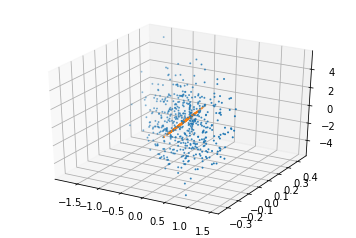

In [379]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )

points = X.transpose()
x,y,z = zip(*points)
ax.scatter(x,y,z, s=1)
Px1 = np.array([[x[0], x[1], 0] for x in Ux.transpose()])
points = Px1
a,b,c = zip(*points)
ax.scatter(a,b,c, s=1)
plt.show()

In [380]:
c = np.random.normal(0, 3**0.5, 3).reshape(3,1)

In [381]:
V = np.random.normal(0, 1, 1000).reshape((2, 500))
X = np.matmul(A, V) + c


In [382]:

U,S_x,V = np.linalg.svd(X, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))
P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print(P)
#Indeed the rank is more than 2, which is not expected. This is because the shift by c changes the rank of the distribution though the rank of data is still 2
#the rank would not increase in the case where c is a linear combination of the two natural dimensions of the data

[76.4800181  31.00128891  7.41472698]
3
[[-0.57534126  0.47623513]
 [ 0.54998056 -0.37650513]
 [ 0.60539559  0.7946345 ]]


In [383]:
Xhat = np.matmul(P, np.matmul(P.transpose(), X))
error = np.linalg.norm(X - Xhat, 'fro')**2
print(error)
#We see that the error is non-negligible when we do not center the data

54.97817615422565


In [385]:

m = np.array([[np.mean(x)] for x in X])
print(m)
U,S_x,V = np.linalg.svd(X - m, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))

P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print(P)
Xhat = np.matmul(P, np.matmul(P.transpose(), X - m)) + m
error = np.linalg.norm(X - Xhat, 'fro')**2
print(error)
#the error is essentially 0 when the data is centered

[[-2.00734612]
 [ 1.96455804]
 [ 1.61633295]]
[3.80813044e+01 1.28193618e+01 4.35651643e-15]
2
[[ 0.04204597  0.99036924]
 [-0.04938295 -0.12980785]
 [-0.99789451  0.04815272]]
5.066582423298388e-28


In [431]:
N = np.random.normal(0, 0.1, 1500).reshape((3,500))
V = np.random.normal(0, 1, 1000).reshape((2, 500))
X = np.matmul(A, V) + N
Xnorm = np.array([x/np.linalg.norm(x) for x in X.transpose()]).transpose()
U,S_x,V = np.linalg.svd(Xnorm, full_matrices=True)

#print rank according to SVD and singular values being larger than some epsilon selected
print(S_x)
print(np.sum(S_x>0.05))
#indeed, the rank of the data is now more than 2

[19.09213787 11.16179459  3.30221338]
3


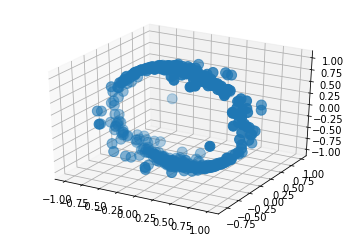

In [432]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
points = Xnorm.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=100)
plt.show()

[[ 0.02334991  0.99348176]
 [-0.05560776 -0.11014108]
 [-0.99817962  0.02937588]]
10.904613231883255
10.90461323188326


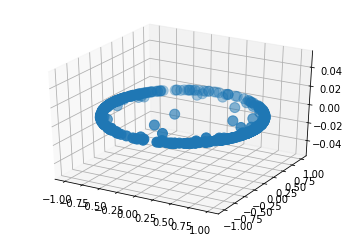

In [433]:
P = np.array([u for u in U.transpose()[S_x>min(S_x)]]).transpose()
print(P)
Xdenoise = np.matmul(P.transpose(), Xnorm)
Xhat = np.matmul(P, Xdenoise)
error = np.linalg.norm(Xnorm - Xhat, 'fro')**2
print(error)
print(S_x[2]**2)
#indeed the error is the same as the square of the third singular value
fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
XD = np.array([[x[0], x[1], 0] for x in Xdenoise.transpose()]).transpose()
points = XD.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=100)
plt.show()

In [168]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

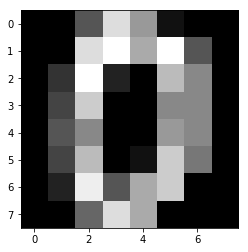

In [342]:
I = images.transpose()
sample_image = images[0].reshape((8,8))
plt.imshow(sample_image, cmap='gray')

36050.010605737145 70550.37640449435
19


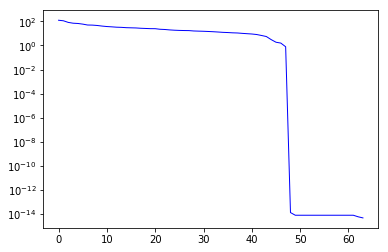

In [416]:
m = np.array([[np.mean(x)] for x in I])
U,S,V = np.linalg.svd(I - m, full_matrices=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(S, color='blue', lw=1)
ax.set_yscale('log')

i = 0
sum = 0

maximum = np.linalg.norm(I-m,  'fro')**2

while sum<0.9*max:
    sum += S[i]**2
    i+=1
print(i+1)

(64, 64) (64, 19) (64, 1) (64, 3) (64, 1)


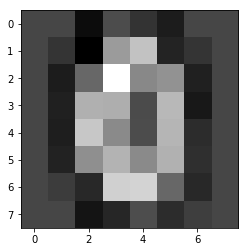

In [428]:
Pk = U.transpose()[:i+1].transpose()
P1 = U.transpose()[:1].transpose()
P3 = U.transpose()[:3].transpose()

print(U.shape, Pk.shape, P1.shape, P3.shape, m.shape)

s_img = images[0].reshape((64,1))
sample_image_P1 = np.matmul(P1, np.matmul(P1.transpose(), s_img))
s_img_P1 = sample_image_P1.reshape((8,8))
plt.imshow(s_img_P1, cmap='gray')

(3, 178)
36050.01060573713
36050.010605737145


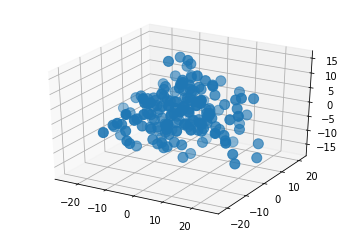

In [429]:
Ifeat = np.matmul(P3.transpose(), I - m)
print(Ifeat.shape)
Ihat = np.matmul(P3, np.matmul(P3.transpose(), I - m)) + m
error = np.linalg.norm(I - Ihat, 'fro')**2
print(error)
print(np.sum([x*x for x in S[3:]]))
#indeed the error is the sum of the squares of singular values not chosen/used

fig, ax = plt.subplots(subplot_kw=dict(projection='3d') )
points = Ifeat.transpose()
a,b,c = zip(*points)
ax.scatter(a,b,c, s=100)
plt.show()

(64, 178)


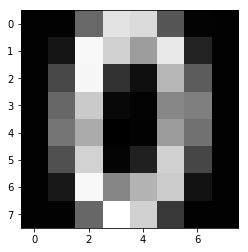

In [430]:
print(Ihat.shape)
sample_image_rec = Ihat.transpose()[0].reshape((8,8))

plt.imshow(sample_image_rec, cmap='gray')